In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense

2023-10-11 17:09:16.600092: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 17:09:17.354950: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 17:09:17.358668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 17:09:19.127032: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [197]:
pak_data = pd.read_csv('pak_combined.csv', low_memory=False)

ind_data = pd.read_csv('ind_combined.csv' , parse_dates=True)

In [198]:
pak_data['Date'] = pd.to_datetime(pak_data['Date'])

# Set the "Date" column as the DataFrame's index
pak_data.set_index('Date', inplace=True)

In [199]:
pak_data = pak_data.sort_values(by='Date')


In [200]:
pak_data

,Unnamed: 0,Price,Open,High,Low,Vol.,Change %,7_day_MA,14_day_MA,21_day_MA,7_day_STD,price_lag1,price_lag2,price_lag3,Company,sectors
Date,,,,,,,,,,,,,,,,
2000-01-03,0,22.70,21.95,22.7,21.95,36.99M,4.61%,24.828571,27.067857,28.002381,1.952105,22.70,22.70,22.70,PTCA,IT
2000-01-03,39435,22.03,22.03,22.03,22.03,0.91K,0.50%,23.755714,25.077857,24.632857,1.134076,22.03,22.03,22.03,ABBT,pharma
2000-01-03,49435,3.02,2.93,3.02,2.77,48.33K,3.07%,3.225714,3.582143,3.812857,0.336148,3.02,3.02,3.02,FAUC,cement
2000-01-03,34435,2.28,2.12,2.31,2.12,30.03K,6.05%,2.621429,3.240000,3.560952,0.404863,2.28,2.28,2.28,MPLF,cement
2000-01-04,49436,2.93,3.02,3.02,2.89,30.43K,-2.98%,3.225714,3.582143,3.812857,0.336148,3.02,3.02,3.02,FAUC,cement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,62616,21.50,21.7,21.99,21.2,2.15M,-0.42%,20.384286,19.758571,19.557619,0.956467,21.59,20.70,20.19,NCPL,power
2023-09-27,31504,26.75,26.75,26.89,26.7,636.56K,0.49%,26.637143,26.219286,25.614286,0.245745,26.62,26.97,26.77,KOTA,power
2023-09-27,34433,33.00,32.03,33.0,31.51,17.50K,0.03%,32.827143,31.869286,32.314762,0.514124,32.99,33.05,33.25,PKPL,power


In [201]:
unique_sectors =  pak_data['sectors'].unique()

In [202]:
sector_mapping = {sector: i for i, sector in enumerate(unique_sectors)}

In [203]:
sector_mapping

{'IT': 0, 'pharma': 1, 'cement': 2, 'power': 3}

In [204]:
pak_data['sectors_id'] = pak_data['sectors'].map(sector_mapping)

In [205]:
one_hot = pd.get_dummies(pak_data['sectors_id'] , prefix = 'sector')
pak_data_encoded = pd.concat([pak_data,one_hot] ,axis  =1) 

In [206]:
pak_data_encoded.drop(['sectors','sectors_id'] ,axis =1,inplace=True )

In [207]:
pak_data_encoded = pak_data_encoded.drop(columns=['Unnamed: 0'])

In [208]:
pak_data_encoded

,Price,Open,High,Low,Vol.,Change %,7_day_MA,14_day_MA,21_day_MA,7_day_STD,price_lag1,price_lag2,price_lag3,Company,sector_0,sector_1,sector_2,sector_3
Date,,,,,,,,,,,,,,,,,,
2000-01-03,22.70,21.95,22.7,21.95,36.99M,4.61%,24.828571,27.067857,28.002381,1.952105,22.70,22.70,22.70,PTCA,1,0,0,0
2000-01-03,22.03,22.03,22.03,22.03,0.91K,0.50%,23.755714,25.077857,24.632857,1.134076,22.03,22.03,22.03,ABBT,0,1,0,0
2000-01-03,3.02,2.93,3.02,2.77,48.33K,3.07%,3.225714,3.582143,3.812857,0.336148,3.02,3.02,3.02,FAUC,0,0,1,0
2000-01-03,2.28,2.12,2.31,2.12,30.03K,6.05%,2.621429,3.240000,3.560952,0.404863,2.28,2.28,2.28,MPLF,0,0,1,0
2000-01-04,2.93,3.02,3.02,2.89,30.43K,-2.98%,3.225714,3.582143,3.812857,0.336148,3.02,3.02,3.02,FAUC,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,21.50,21.7,21.99,21.2,2.15M,-0.42%,20.384286,19.758571,19.557619,0.956467,21.59,20.70,20.19,NCPL,0,0,0,1
2023-09-27,26.75,26.75,26.89,26.7,636.56K,0.49%,26.637143,26.219286,25.614286,0.245745,26.62,26.97,26.77,KOTA,0,0,0,1
2023-09-27,33.00,32.03,33.0,31.51,17.50K,0.03%,32.827143,31.869286,32.314762,0.514124,32.99,33.05,33.25,PKPL,0,0,0,1


In [209]:
pak_data_encoded['Low'] = pak_data_encoded['Low'].str.replace(',', '').astype(float)

pak_data_encoded['Open'] = pak_data_encoded['Open'].str.replace(',', '', regex=True).astype(float)
pak_data_encoded['High'] = pak_data_encoded['High'].str.replace(',', '', regex=True).astype(float)
# pak_data_encoded['Price'] = pak_data_encoded['Price'].str.replace(',', '', regex=True).astype(float)


In [210]:
pak_data_encoded['Low'] = pd.to_numeric(pak_data_encoded['Low'] )
# pak_data_encoded['Price'] = pd.to_numeric(pak_data_encoded['Price'] )
pak_data_encoded['Open'] = pd.to_numeric(pak_data_encoded['Open'] )
pak_data_encoded['High'] = pd.to_numeric(pak_data_encoded['High'] )
# pak_data_encoded['Vol.'] = pd.to_numeric(pak_data_encoded['Vol.'] )


In [211]:
pak_data_encoded.isna().sum()

Price          0
Open           0
High           0
Low            0
Vol.          11
Change %       0
7_day_MA       0
14_day_MA      0
21_day_MA      0
7_day_STD      0
price_lag1     0
price_lag2     0
price_lag3     0
Company        0
sector_0       0
sector_1       0
sector_2       0
sector_3       0
dtype: int64

In [212]:
unique_symbol =(pak_data_encoded['Company'].unique())

In [213]:
symbol_mapping = {symbol: i for i , symbol in enumerate(unique_symbol)}

In [214]:
pak_data_encoded['symbol_id'] = pak_data_encoded['Company'].map(symbol_mapping)

In [215]:
symbol_one_hot = pd.get_dummies(pak_data_encoded['symbol_id'], prefix="symbol")

In [216]:
pak_data_encoded = pd.concat([pak_data_encoded,symbol_one_hot] ,axis  =1) 

In [217]:
pak_data_encoded.drop(['Company'] ,axis =1,inplace=True )

In [218]:
pak_data_encoded

,Price,Open,High,Low,Vol.,Change %,7_day_MA,14_day_MA,21_day_MA,7_day_STD,...,symbol_6,symbol_7,symbol_8,symbol_9,symbol_10,symbol_11,symbol_12,symbol_13,symbol_14,symbol_15
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,22.70,21.95,22.70,21.95,36.99M,4.61%,24.828571,27.067857,28.002381,1.952105,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,22.03,22.03,22.03,22.03,0.91K,0.50%,23.755714,25.077857,24.632857,1.134076,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,3.02,2.93,3.02,2.77,48.33K,3.07%,3.225714,3.582143,3.812857,0.336148,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,2.28,2.12,2.31,2.12,30.03K,6.05%,2.621429,3.240000,3.560952,0.404863,...,0,0,0,0,0,0,0,0,0,0
2000-01-04,2.93,3.02,3.02,2.89,30.43K,-2.98%,3.225714,3.582143,3.812857,0.336148,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,21.50,21.70,21.99,21.20,2.15M,-0.42%,20.384286,19.758571,19.557619,0.956467,...,0,0,0,0,0,1,0,0,0,0
2023-09-27,26.75,26.75,26.89,26.70,636.56K,0.49%,26.637143,26.219286,25.614286,0.245745,...,0,0,0,1,0,0,0,0,0,0
2023-09-27,33.00,32.03,33.00,31.51,17.50K,0.03%,32.827143,31.869286,32.314762,0.514124,...,0,0,0,0,0,0,1,0,0,0


In [219]:
pak_data_encoded.isna().sum()

Price          0
Open           0
High           0
Low            0
Vol.          11
Change %       0
7_day_MA       0
14_day_MA      0
21_day_MA      0
7_day_STD      0
price_lag1     0
price_lag2     0
price_lag3     0
sector_0       0
sector_1       0
sector_2       0
sector_3       0
symbol_id      0
symbol_0       0
symbol_1       0
symbol_2       0
symbol_3       0
symbol_4       0
symbol_5       0
symbol_6       0
symbol_7       0
symbol_8       0
symbol_9       0
symbol_10      0
symbol_11      0
symbol_12      0
symbol_13      0
symbol_14      0
symbol_15      0
dtype: int64

In [220]:
pak_data_encoded.to_csv('pak_preprocess_data.csv')

In [3]:
preprocessed_data = pd.read_csv('pak_preprocess_data.csv', parse_dates=True)

In [4]:
preprocessed_data = preprocessed_data.drop('symbol_id', axis=1)


In [5]:
columns_to_normalize = ['Open' , 'High' ,'Low' ,'7_day_MA','14_day_MA' ,'21_day_MA' ,'7_day_STD' ,'price_lag1'
                       , 'price_lag2' , 'price_lag3'
                    ]

## Normalizing

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Normalize the selected columns
preprocessed_data[columns_to_normalize] = scaler.fit_transform(preprocessed_data[columns_to_normalize])


In [7]:
preprocessed_data = preprocessed_data.drop(['Vol.','Change %'] , axis =1)

In [8]:
preprocessed_data

,Date,Price,Open,High,Low,7_day_MA,14_day_MA,21_day_MA,7_day_STD,price_lag1,...,symbol_6,symbol_7,symbol_8,symbol_9,symbol_10,symbol_11,symbol_12,symbol_13,symbol_14,symbol_15
0,2000-01-03,22.70,0.018675,0.018986,0.019046,0.021949,0.024662,0.025925,0.029194,0.019465,...,0,0,0,0,0,0,0,0,0,0
1,2000-01-03,22.03,0.018746,0.018400,0.019119,0.020962,0.022780,0.022690,0.016960,0.018867,...,0,0,0,0,0,0,0,0,0,0
2,2000-01-03,3.02,0.001769,0.001783,0.001692,0.002060,0.002445,0.002699,0.005027,0.001877,...,0,0,0,0,0,0,0,0,0,0
3,2000-01-03,2.28,0.001049,0.001163,0.001104,0.001503,0.002122,0.002457,0.006055,0.001215,...,0,0,0,0,0,0,0,0,0,0
4,2000-01-04,2.93,0.001849,0.001783,0.001801,0.002060,0.002445,0.002699,0.005027,0.001877,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62612,2023-09-26,21.50,0.018452,0.018365,0.018368,0.017858,0.017748,0.017817,0.014304,0.018473,...,0,0,0,0,0,1,0,0,0,0
62613,2023-09-27,26.75,0.022941,0.022648,0.023344,0.023615,0.023859,0.023632,0.003675,0.022969,...,0,0,0,1,0,0,0,0,0,0
62614,2023-09-27,33.00,0.027634,0.027989,0.027696,0.029314,0.029204,0.030066,0.007689,0.028662,...,0,0,0,0,0,0,1,0,0,0
62615,2023-09-28,26.79,0.022994,0.022692,0.023254,0.023690,0.023914,0.023780,0.002482,0.023085,...,0,0,0,1,0,0,0,0,0,0


In [9]:
X = preprocessed_data[['Open', 'High', 'Low', '7_day_MA', '14_day_MA', '21_day_MA', '7_day_STD', 'price_lag1', 'price_lag2', 'price_lag3',]].values
y = preprocessed_data['Price'].values

In [10]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# Y_train = np.array(Y_train)
# Y_test = np.array(Y_test)

sequence_length = 100

# Create sequences
X_sequences = []
y_target = []

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i+sequence_length])
    y_target.append(y[i+sequence_length])

X_sequences = np.array(X_sequences)
y_target = np.array(y_target)



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_target, test_size=0.2, random_state=42)

In [12]:
from keras.optimizers import Adam

learning_rate = 10.0

optimizer = Adam()
optimizer.lr = learning_rate

# Define the model architecture
model = Sequential()

model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, X.shape[1])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
1563/1563 [==============================] - 160s 100ms/step - loss: 19645.4980
Epoch 2/15
1563/1563 [==============================] - 154s 99ms/step - loss: 17959.8867
Epoch 3/15
 660/1563 [===========>..................] - ETA: 1:16 - loss: 17666.8066

KeyboardInterrupt: 

In [316]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

392/392 [==============================] - 2s 5ms/step - loss: 15925.0068
Test Loss: 15925.0068359375


In [297]:
y_pred = model.predict(X_test)


392/392 [==============================] - 2s 5ms/step


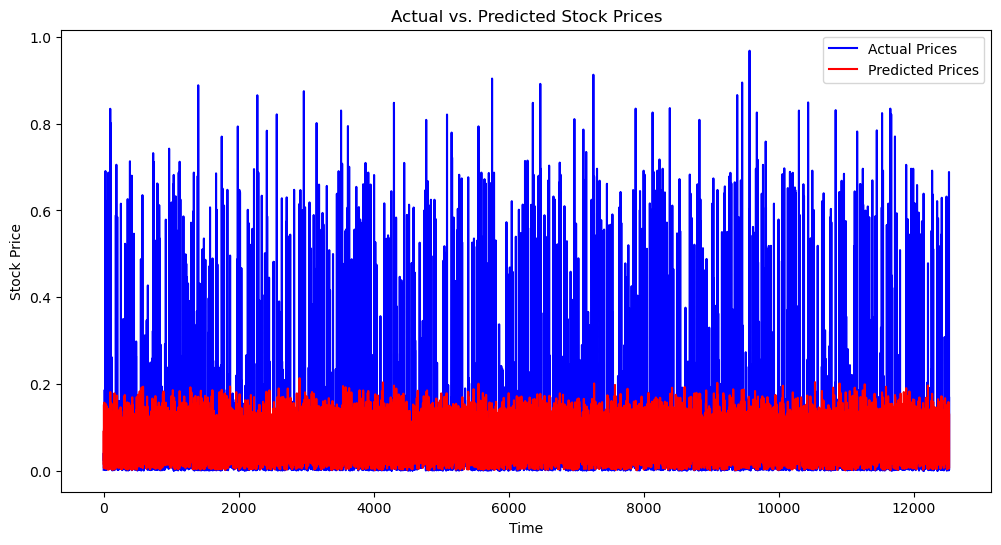

In [298]:
import matplotlib.pyplot as plt

# Get the model's predictions on the test data

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
